# Map of sub-domain of ANHA12

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle

%matplotlib inline

###### Parameters:

In [2]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# Resolution of grid cells to show in figure:
grid_reso = 10

###### Load files:

In [3]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

###### Figure:

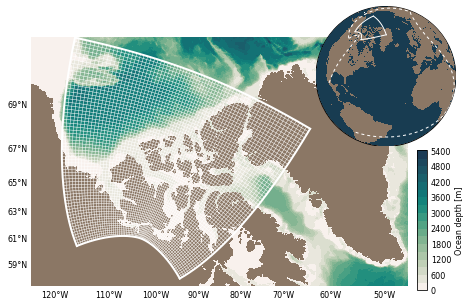

In [4]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/'+\
                                               'surface-land-map-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

bath = proj2.contourf(x, y, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# Sub-domain
proj2.plot(x[imin:imax,jmin], y[imin:imax,jmin], 'w-', lw=1, zorder=3)
proj2.plot(x[imin:imax,jmax], y[imin:imax,jmax], 'w-', lw=1, zorder=3)
proj2.plot(x[imin,jmin:jmax], y[imin,jmin:jmax], 'w-', lw=1, zorder=3)
proj2.plot(x[imax,jmin:jmax], y[imax,jmin:jmax], 'w-', lw=1, zorder=3)
# full domain
proj2.plot(x[460:-1:grid_reso,0]   , y[460:-1:grid_reso,0]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[0,370:-1:grid_reso]   , y[0,370:-1:grid_reso]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[100:-1:grid_reso,-1]  , y[100:-1:grid_reso,-1]       , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[-1,0:-1:grid_reso]    , y[-1,0:-1:grid_reso]         , 'w--', lw=1,zorder=3, dashes=(3, 3))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax]  , 'w-', lw=2.0, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax]  , 'w-', lw=2.0, zorder=5)

proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], 'w-', lw=0.5, zorder=3);
proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, 'w-', lw=0.5, zorder=3);


# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.92, 0.18, 0.02, 0.35]);
CBar   = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
CBar.set_label('Ocean depth [m]', fontsize=8)
CBar.ax.tick_params(axis='y', length=0, labelsize=8)

figure = plt.gcf()
figure.set_size_inches(4.5*1.5, 3.7*1.5)

# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/M1-sub-domain.png', bbox_inches='tight', dpi=300)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/M1-sub-domain.svg', bbox_inches='tight', format='svg', dpi=300)